## importing the libaries

In [68]:
pip install --user imbalanced-learn

Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import metrics
from scipy.stats import zscore
from sklearn.preprocessing import LabelEncoder,OrdinalEncoder,StandardScaler
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score,roc_auc_score

import warnings
warnings.filterwarnings('ignore')


In [3]:
df=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset1/master/census_income.csv')
df.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [4]:
#Checking the shape of the dataset
df.shape

(32560, 15)

In [5]:
#checking the columns with name
df.columns

Index(['Age', 'Workclass', 'Fnlwgt', 'Education', 'Education_num',
       'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex',
       'Capital_gain', 'Capital_loss', 'Hours_per_week', 'Native_country',
       'Income'],
      dtype='object')

### finding the null values in the dataset

In [6]:
df.isna().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

In [7]:
df.dtypes

Age                int64
Workclass         object
Fnlwgt             int64
Education         object
Education_num      int64
Marital_status    object
Occupation        object
Relationship      object
Race              object
Sex               object
Capital_gain       int64
Capital_loss       int64
Hours_per_week     int64
Native_country    object
Income            object
dtype: object

In [8]:
#Summary of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32560 non-null  int64 
 1   Workclass       32560 non-null  object
 2   Fnlwgt          32560 non-null  int64 
 3   Education       32560 non-null  object
 4   Education_num   32560 non-null  int64 
 5   Marital_status  32560 non-null  object
 6   Occupation      32560 non-null  object
 7   Relationship    32560 non-null  object
 8   Race            32560 non-null  object
 9   Sex             32560 non-null  object
 10  Capital_gain    32560 non-null  int64 
 11  Capital_loss    32560 non-null  int64 
 12  Hours_per_week  32560 non-null  int64 
 13  Native_country  32560 non-null  object
 14  Income          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [9]:
df.describe() #Statistical information

,Age,Fnlwgt,Education_num,Capital_gain,Capital_loss,Hours_per_week
count,32560.000000,3.256000e+04,32560.000000,32560.000000,32560.000000,32560.000000
mean,38.581634,1.897818e+05,10.080590,1077.615172,87.306511,40.437469
std,13.640642,1.055498e+05,2.572709,7385.402999,402.966116,12.347618
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178315e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783630e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370545e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [10]:
#Dropping the duplicate values from the data
df.drop_duplicates(inplace=True)
print(df.shape)

(32536, 15)


In [11]:
#fetching the unique value of each columns
df.nunique()

Age                  73
Workclass             9
Fnlwgt            21647
Education            16
Education_num        16
Marital_status        7
Occupation           15
Relationship          6
Race                  5
Sex                   2
Capital_gain        119
Capital_loss         92
Hours_per_week       94
Native_country       42
Income                2
dtype: int64

In [12]:
# Separating the categorical data type 
obj_type=[]
for i in df.dtypes.index:
    if df.dtypes[i]=='object':
        obj_type.append(i)
obj_type

['Workclass',
 'Education',
 'Marital_status',
 'Occupation',
 'Relationship',
 'Race',
 'Sex',
 'Native_country',
 'Income']

In [13]:
#separating the numerical data
int_type=[]
for i in df.dtypes.index:
    if df.dtypes[i]=='int64':
        int_type.append(i)
int_type

['Age',
 'Fnlwgt',
 'Education_num',
 'Capital_gain',
 'Capital_loss',
 'Hours_per_week']

In [14]:
#checking the value count of each columns
for col in obj_type:
    print(col)
    print(df[col].value_counts())
    print('-'*50)

Workclass
 Private             22673
 Self-emp-not-inc     2540
 Local-gov            2093
 ?                    1836
 State-gov            1297
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: Workclass, dtype: int64
--------------------------------------------------
Education
 HS-grad         10494
 Some-college     7282
 Bachelors        5352
 Masters          1722
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           645
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           332
 1st-4th           166
 Preschool          50
Name: Education, dtype: int64
--------------------------------------------------
Marital_status
 Married-civ-spouse       14970
 Never-married            10666
 Divorced                  4441
 Separated                 1025
 Widowed                    993
 Married-spouse-absent      418


from above we have seen that at some places in the 3 columns have ? so we are replacing them with other name

In [15]:
df['Workclass'].replace({'?':'unknown-Workclass'},inplace=True)
df['Occupation'].replace({'Occupation':'Unknown-Occupation'},inplace=True)
df['Native_country'].replace({'Native_country':'other'},inplace=True)

## Data Visualization

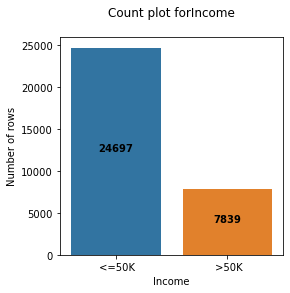

In [16]:
#countplot for income
plt.figure(figsize=(4,4))
plot_name='Income'
values=df[plot_name].value_counts()
index=0
ax=sns.countplot(df[plot_name])

for i in ax.get_xticklabels():
        ax.text(index, values[i.get_text()]/2, values[i.get_text()], 
                horizontalalignment="center", fontweight='bold')
        index += 1
plt.title(f'Count plot for{plot_name}\n')
plt.ylabel(f'Number of rows')
plt.show()

Target(Income) column have imbalance dataset so we havw to balance it later before model buiding for good performance

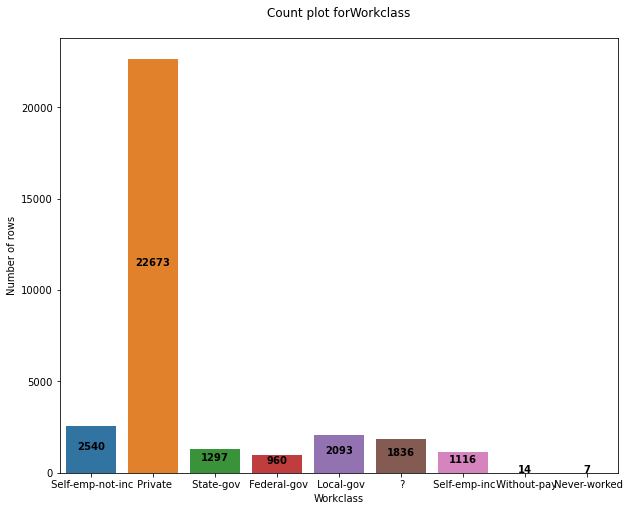

In [17]:
plt.figure(figsize=(10,8))
plot_name='Workclass'
values=df[plot_name].value_counts()
index=0
ax=sns.countplot(df[plot_name])

for i in ax.get_xticklabels():
        ax.text(index, values[i.get_text()]/2, values[i.get_text()],horizontalalignment='center', fontweight='bold')
        index += 1
plt.title(f'Count plot for{plot_name}\n')
plt.ylabel(f'Number of rows')
plt.show()

from workclass graph we see that private workclass people are more

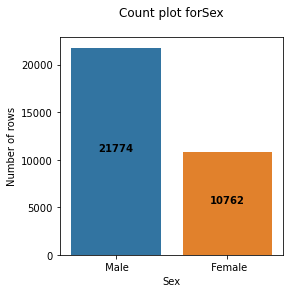

In [18]:
plt.figure(figsize=(4,4))
plot_name='Sex'
values=df[plot_name].value_counts()
index=0
ax=sns.countplot(df[plot_name])

for i in ax.get_xticklabels():
        ax.text(index, values[i.get_text()]/2, values[i.get_text()],horizontalalignment="center", fontweight='bold')
        index += 1
plt.title(f'Count plot for{plot_name}\n')
plt.ylabel(f'Number of rows')
plt.show()

Male count is more as compared to women

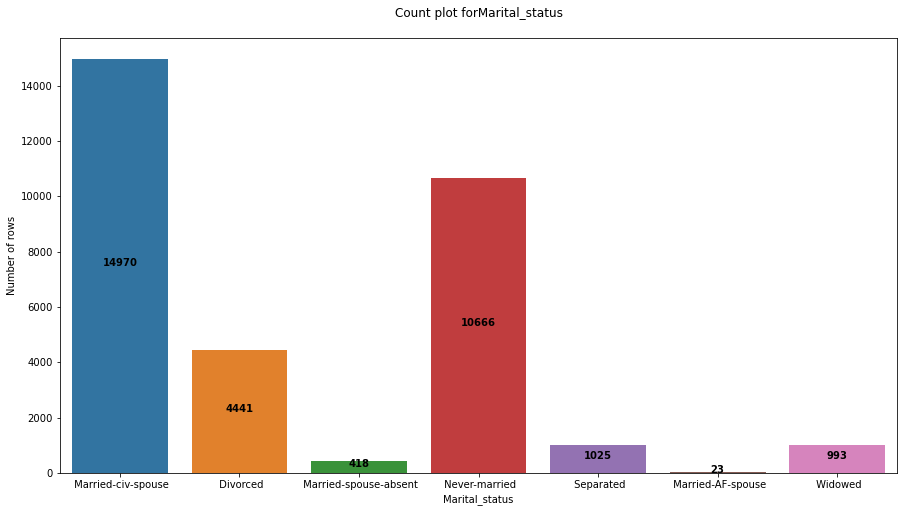

In [19]:
plt.figure(figsize=(15,8))
plot_name='Marital_status'
values=df[plot_name].value_counts()
index=0
ax=sns.countplot(df[plot_name])

for i in ax.get_xticklabels():
        ax.text(index, values[i.get_text()]/2, values[i.get_text()],horizontalalignment="center", fontweight='bold')
        index += 1
        
plt.title(f'Count plot for{plot_name}\n')
plt.ylabel(f'Number of rows')
plt.show()

From the above countplot we see that the Marital Status column has married spouse and never married people on the higher edge as compared to the other values.

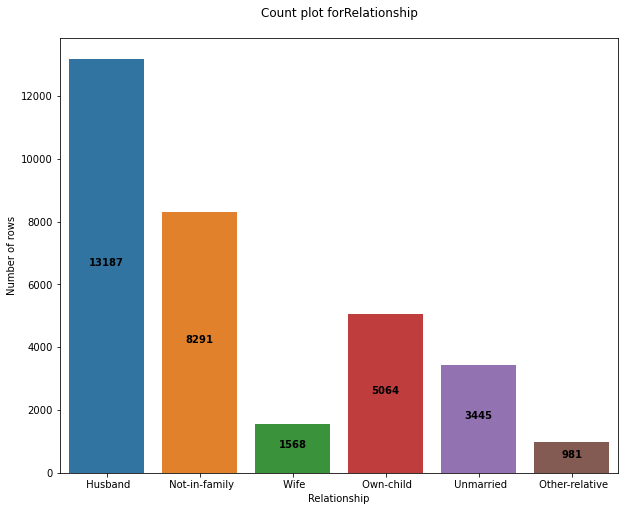

In [20]:
plt.figure(figsize=(10,8))
plot_name='Relationship'
values=df[plot_name].value_counts()
index=0
ax=sns.countplot(df[plot_name])

for i in ax.get_xticklabels():
        ax.text(index, values[i.get_text()]/2, values[i.get_text()],horizontalalignment="center", fontweight='bold')
        index += 1
plt.title(f'Count plot for{plot_name}\n')
plt.ylabel(f'Number of rows')
plt.show()

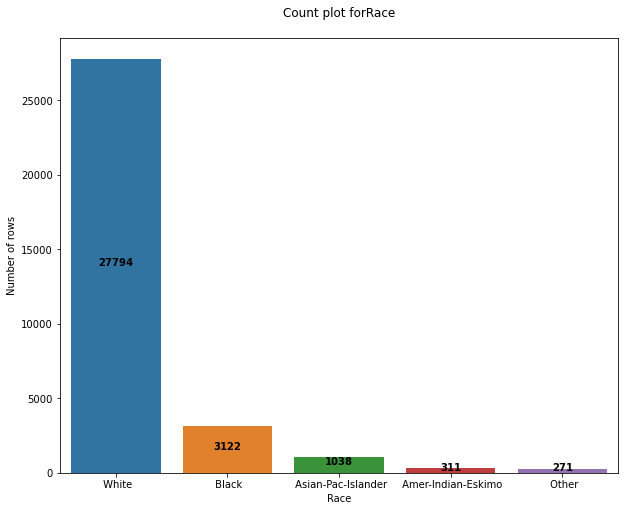

In [21]:
plt.figure(figsize=(10,8))
plot_name='Race'
values=df[plot_name].value_counts()
index=0
ax=sns.countplot(df[plot_name])

for i in ax.get_xticklabels():
        ax.text(index, values[i.get_text()]/2, values[i.get_text()],horizontalalignment="center", fontweight='bold')
        index += 1
plt.title(f'Count plot for{plot_name}\n')
plt.ylabel(f'Number of rows')
plt.show()

from above we see Race column have high white class people

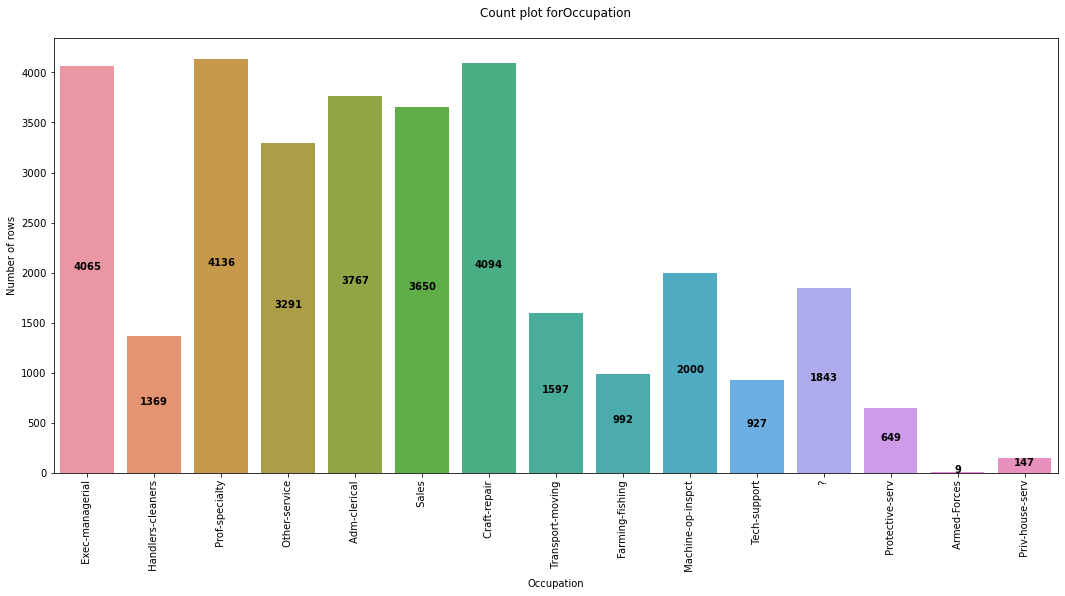

In [22]:
plt.figure(figsize=(18,8))
plot_name='Occupation'
values=df[plot_name].value_counts()
index=0
ax=sns.countplot(df[plot_name])

for i in ax.get_xticklabels():
        ax.text(index, values[i.get_text()]/2, values[i.get_text()], 
                horizontalalignment="center", fontweight='bold')
        index += 1
plt.title(f'Count plot for{plot_name}\n')
plt.ylabel(f'Number of rows')
plt.xticks(rotation=90)
plt.show()

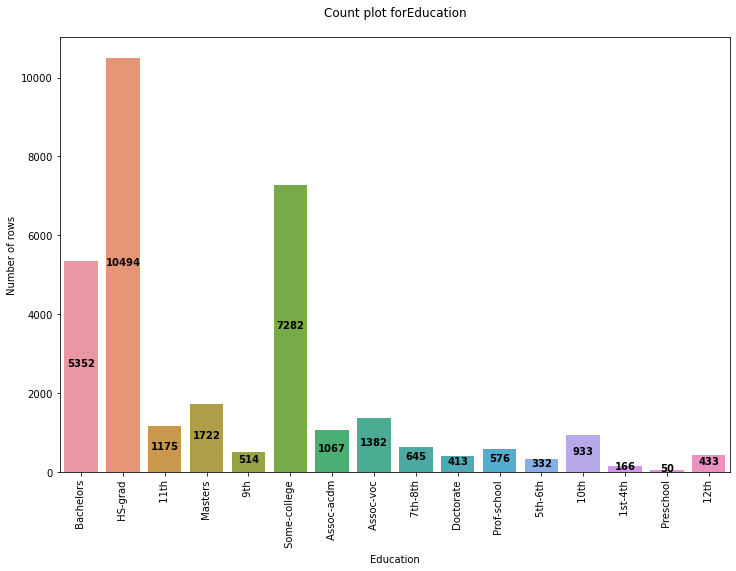

In [23]:
plt.figure(figsize=(12,8))
plot_name='Education'
values=df[plot_name].value_counts()
index=0
ax=sns.countplot(df[plot_name])

for i in ax.get_xticklabels():
        ax.text(index, values[i.get_text()]/2, values[i.get_text()], 
                horizontalalignment="center", fontweight='bold')
        index += 1
plt.title(f'Count plot for{plot_name}\n')
plt.ylabel(f'Number of rows')
plt.xticks(rotation=90)
plt.show()

From above plot we see that the Education column has the highest number of values in HS grad followed by Some college and Bachelors. Remaining education categories have quite lesser data coverage in our dataset.

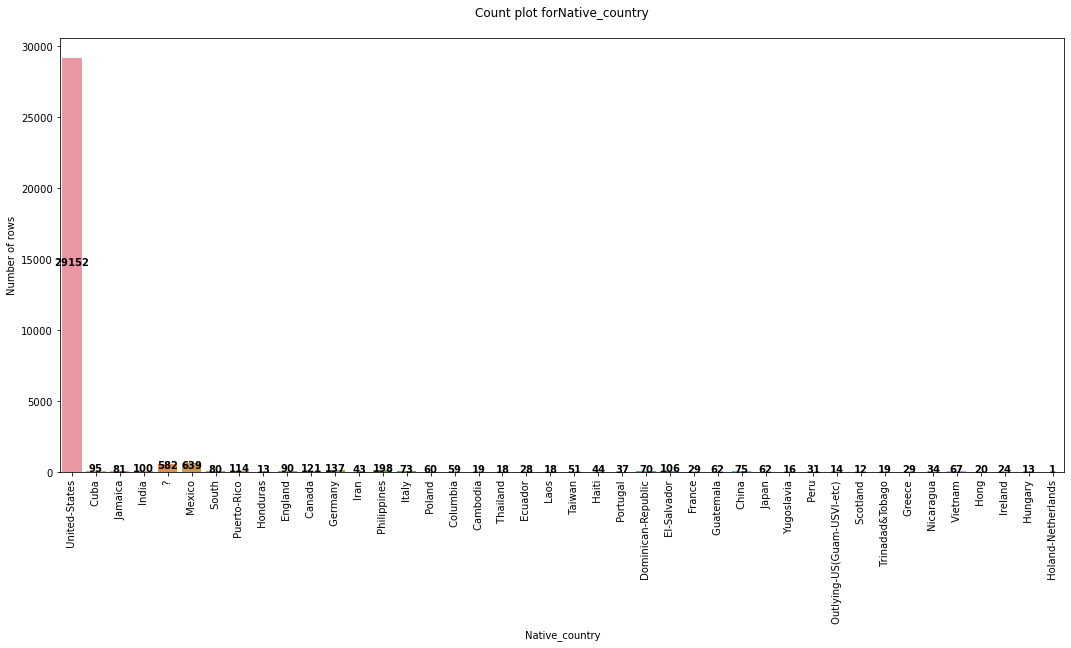

In [24]:
plt.figure(figsize=(18,8))
plot_name='Native_country'
values=df[plot_name].value_counts()
index=0
ax=sns.countplot(df[plot_name])

for i in ax.get_xticklabels():
        ax.text(index, values[i.get_text()]/2, values[i.get_text()], 
                horizontalalignment="center", fontweight='bold')
        index += 1
plt.title(f'Count plot for{plot_name}\n')
plt.ylabel(f'Number of rows')
plt.xticks(rotation=90)
plt.show()

## Bivarant Analysis

<AxesSubplot:xlabel='Income', ylabel='Age'>

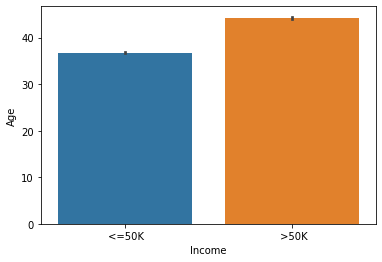

In [25]:
# Income and Age
sns.barplot(x='Income',y='Age',data=df)

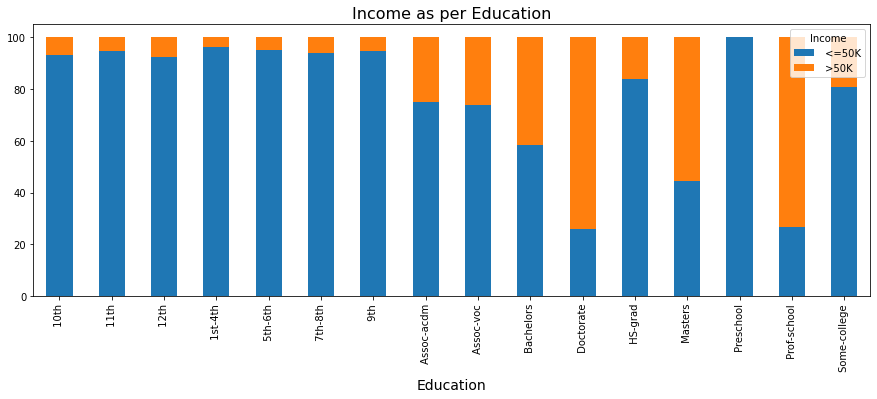

In [26]:
graph=pd.crosstab(df['Education'],df['Income'])
(graph.div(graph.sum(axis=1),axis=0)*100).plot(kind='bar',stacked='True',figsize=(15,5))
plt.title('Income as per Education',fontsize=16)
plt.xlabel('Education',fontsize=14)
plt.show()

From above cross tab plot we see different education types of people and their income scale. It seems like people with >50K income have a qualification in doctorate, masters and professional school.

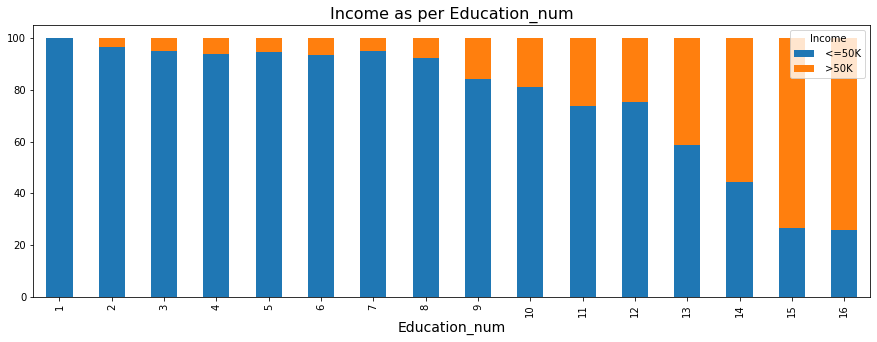

In [27]:
graph=pd.crosstab(df['Education_num'],df['Income'])
(graph.div(graph.sum(axis=1),axis=0)*100).plot(kind='bar',stacked='True',figsize=(15,5))
plt.title('Income as per Education_num',fontsize=16)
plt.xlabel('Education_num',fontsize=14)
plt.show()

From this cross tab bar plot we see education number scale which indicated that to earn an income of >50K you need to have a higher educational number emphasizing the importance on the educational front.

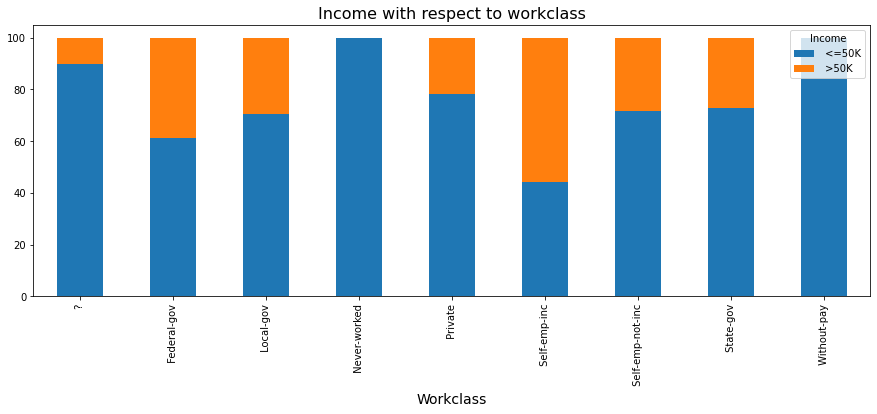

In [28]:
graph=pd.crosstab(df['Workclass'],df['Income'])
(graph.div(graph.sum(axis=1),axis=0)*100).plot(kind='bar',stacked='True',figsize=(15,5))
plt.title('Income with respect to workclass',fontsize=16)
plt.xlabel('Workclass',fontsize=14)
plt.show()

This cross tab bar plot shows the working class information and people who have never worked or are sitting without pay obviously come under <=50K income bracket while mostly people who are self employed or own a business are able to make an income of >50K.

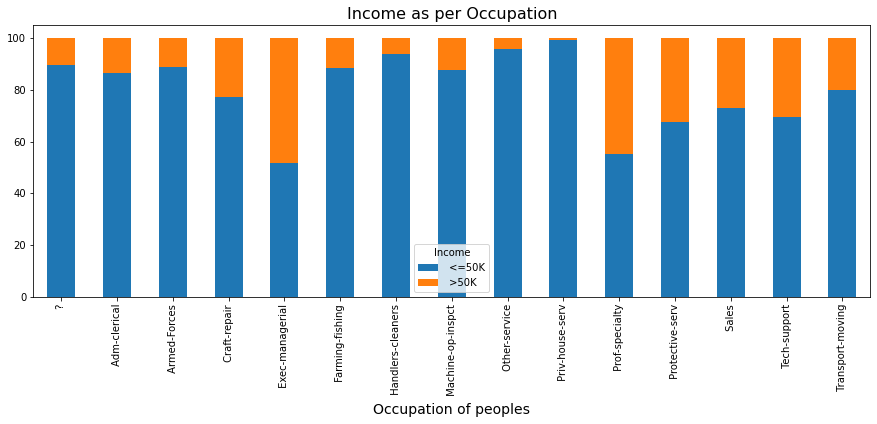

In [29]:
graph=pd.crosstab(df['Occupation'],df['Income'])
(graph.div(graph.sum(axis=1),axis=0)*100).plot(kind='bar',stacked='True',figsize=(15,5))
plt.title('Income as per Occupation',fontsize=16)
plt.xlabel('Occupation of peoples',fontsize=14)
plt.show()

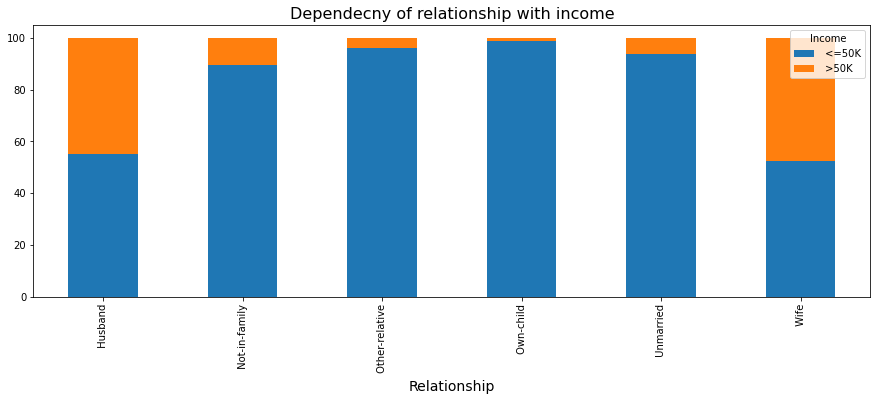

In [30]:
graph=pd.crosstab(df['Relationship'],df['Income'])
(graph.div(graph.sum(axis=1),axis=0)*100).plot(kind='bar',stacked='True',figsize=(15,5))
plt.title('Dependecny of relationship with income',fontsize=16)
plt.xlabel('Relationship',fontsize=14)
plt.show()

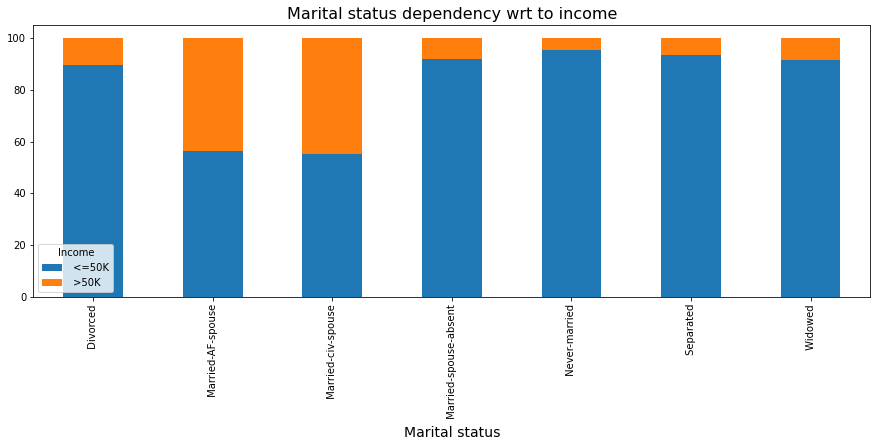

In [31]:
graph=pd.crosstab(df['Marital_status'],df['Income'])
(graph.div(graph.sum(axis=1),axis=0)*100).plot(kind='bar',stacked='True',figsize=(15,5))
plt.title('Marital status dependency wrt to income',fontsize=16)
plt.xlabel('Marital status',fontsize=14)
plt.show()

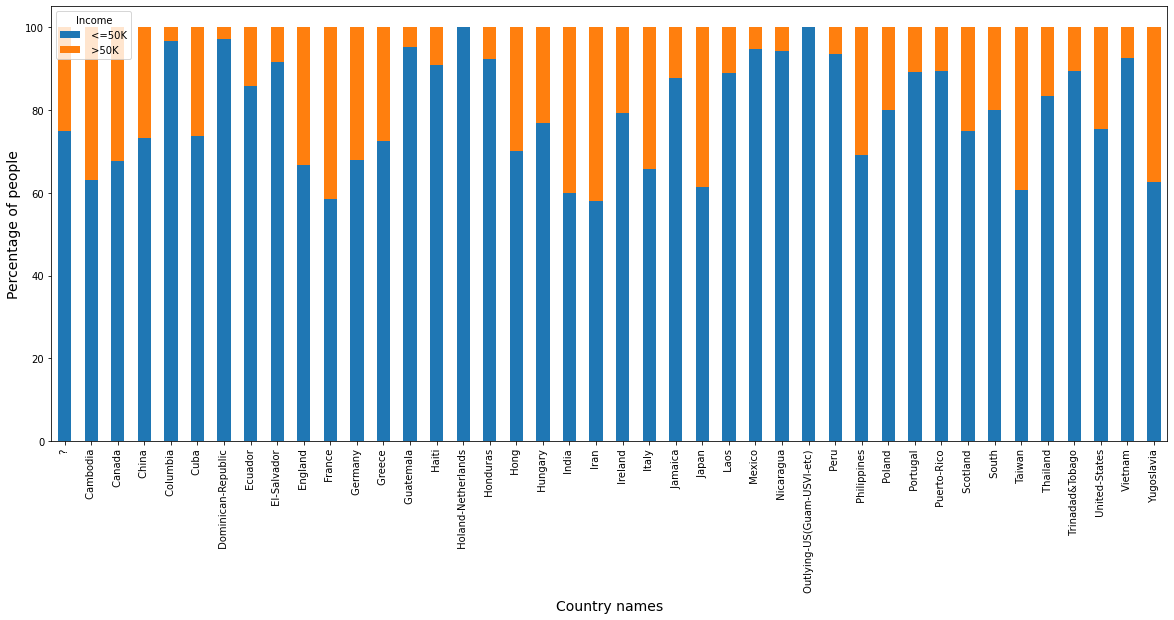

In [32]:
graph=pd.crosstab(df['Native_country'],df['Income'])
(graph.div(graph.sum(axis=1),axis=0)*100).plot(kind='bar',stacked='True',figsize=(20,8))
plt.xlabel('Country names',fontsize=14)
plt.ylabel('Percentage of people', fontsize=14)
plt.show()

Thiscross tab bar plot shows the native country details for people settled in the US. In order to earn >50K the native country details recorded are for Cambodia, Canada, France, Germany, Greece, Hong Kong, India, Iran, Italy, Japan, Phillipines, Taiwan, Yugoslavia.

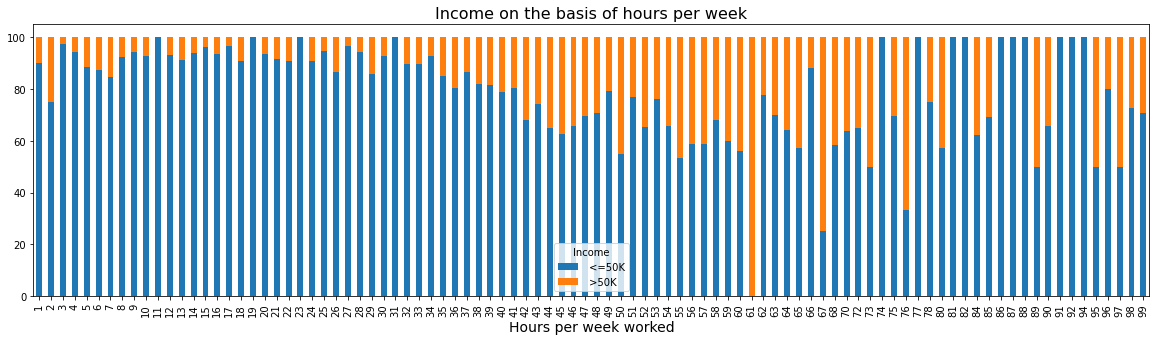

In [33]:
graph=pd.crosstab(df['Hours_per_week'],df['Income'])
(graph.div(graph.sum(axis=1),axis=0)*100).plot(kind='bar',stacked='True',figsize=(20,5))
plt.title('Income on the basis of hours per week',fontsize=16)
plt.xlabel('Hours per week worked',fontsize=14)
plt.show()

 people with >50K income mostly work 61 hours per week or range from 50-80 hours per week mostly.

### Label Encoding

In [34]:
le=LabelEncoder()
df['Income']=le.fit_transform(df['Income'])
df.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,0


In [35]:
#Ordinal Encoder for features columns
oe=OrdinalEncoder()
df['Workclass']=oe.fit_transform(df['Workclass'].values.reshape(-1,1))
df['Education']=oe.fit_transform(df['Education'].values.reshape(-1,1))
df['Occupation']=oe.fit_transform(df['Occupation'].values.reshape(-1,1))
df['Relationship']=oe.fit_transform(df['Relationship'].values.reshape(-1,1))
df['Native_country']=oe.fit_transform(df['Native_country'].values.reshape(-1,1))
df['Marital_status']=oe.fit_transform(df['Marital_status'].values.reshape(-1,1))
df['Race']=oe.fit_transform(df['Race'].values.reshape(-1,1))
df['Sex']=oe.fit_transform(df['Sex'].values.reshape(-1,1))
df.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,6.0,83311,9.0,13,2.0,4.0,0.0,4.0,1.0,0,0,13,39.0,0
1,38,4.0,215646,11.0,9,0.0,6.0,1.0,4.0,1.0,0,0,40,39.0,0
2,53,4.0,234721,1.0,7,2.0,6.0,0.0,2.0,1.0,0,0,40,39.0,0
3,28,4.0,338409,9.0,13,2.0,10.0,5.0,2.0,0.0,0,0,40,5.0,0
4,37,4.0,284582,12.0,14,2.0,4.0,5.0,4.0,0.0,0,0,40,39.0,0


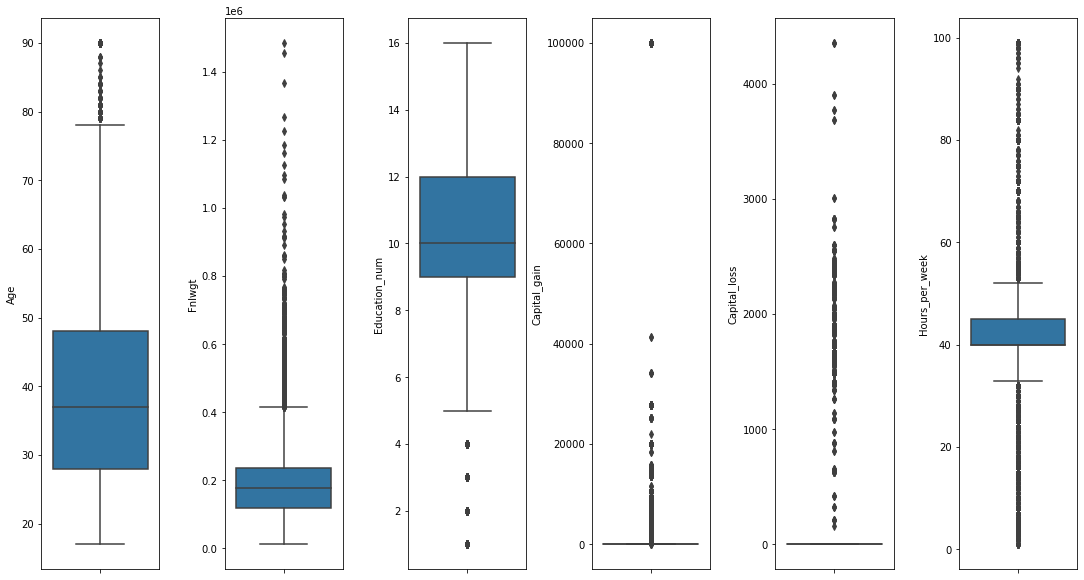

In [36]:
#Box Plot
fig,ax=plt.subplots(ncols=6,nrows=1,figsize=(15,8))
index=0
ax=ax.flatten()
for col ,value in df[int_type].items():
    sns.boxplot(y=col,data=df,ax=ax[index])
    index+=1
plt.tight_layout(pad=0.5,w_pad=0.5,h_pad=1.0)
plt.show()

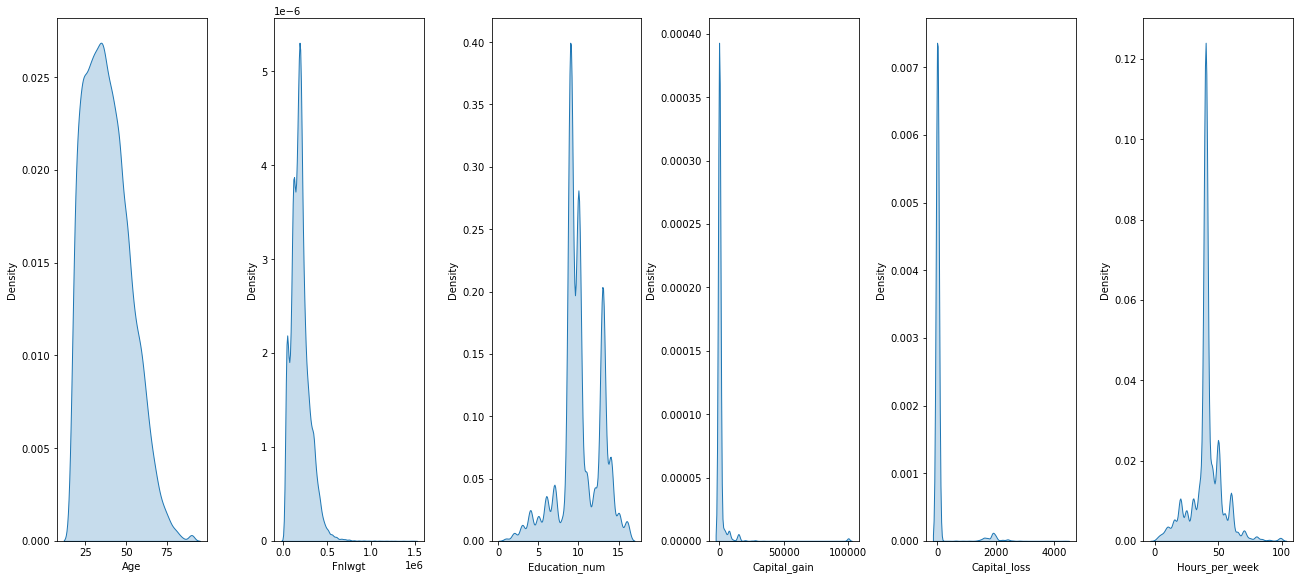

In [37]:
# Distribution Plot
fig,ax=plt.subplots(ncols=6,nrows=1,figsize=(18,8))
index=0
ax=ax.flatten()
for col ,value in df[int_type].items():
    sns.distplot(value,ax=ax[index],hist=False,kde_kws={'shade':True})
    index+=1
plt.tight_layout(pad=0.5,w_pad=0.5,h_pad=1.0)
plt.show()

In [38]:
# sns.pairplot(df[int_type],diag_kind='kde')

In [39]:
df.corr() #Correlation matrix

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
Age,1.000000,0.003781,-0.076448,-0.010551,0.036224,-0.266142,-0.020911,-0.263744,0.029116,0.088708,0.077676,0.057745,0.068515,-0.001524,0.234039
Workclass,0.003781,1.000000,-0.016532,0.023480,0.052099,-0.064828,0.255105,-0.090421,0.049717,0.095960,0.033845,0.012255,0.139059,-0.007697,0.051706
Fnlwgt,-0.076448,-0.016532,1.000000,-0.028065,-0.043353,0.028154,0.001360,0.008859,-0.021484,0.027113,0.000433,-0.010267,-0.018900,-0.051866,-0.009521
Education,-0.010551,0.023480,-0.028065,1.000000,0.359105,-0.038413,-0.021249,-0.011060,0.014307,-0.027426,0.030086,0.016790,0.055991,0.063874,0.079361
Education_num,0.036224,0.052099,-0.043353,0.359105,1.000000,-0.069196,0.109804,-0.094424,0.031998,0.012181,0.122661,0.079901,0.148426,0.050127,0.335299
Marital_status,-0.266142,-0.064828,0.028154,-0.038413,-0.069196,1.000000,-0.009778,0.185542,-0.067942,-0.129425,-0.043373,-0.034134,-0.190433,-0.023414,-0.199187
Occupation,-0.020911,0.255105,0.001360,-0.021249,0.109804,-0.009778,1.000000,-0.075600,0.006811,0.080532,0.025513,0.017977,0.080502,-0.012394,0.075398
Relationship,-0.263744,-0.090421,0.008859,-0.011060,-0.094424,0.185542,-0.075600,1.000000,-0.116048,-0.582593,-0.057945,-0.061100,-0.248876,-0.005634,-0.250955
Race,0.029116,0.049717,-0.021484,0.014307,0.031998,-0.067942,0.006811,-0.116048,1.000000,0.087464,0.011152,0.018916,0.041921,0.137847,0.071855
Sex,0.088708,0.095960,0.027113,-0.027426,0.012181,-0.129425,0.080532,-0.582593,0.087464,1.000000,0.048486,0.045576,0.229190,-0.008262,0.215984


## Heatmap

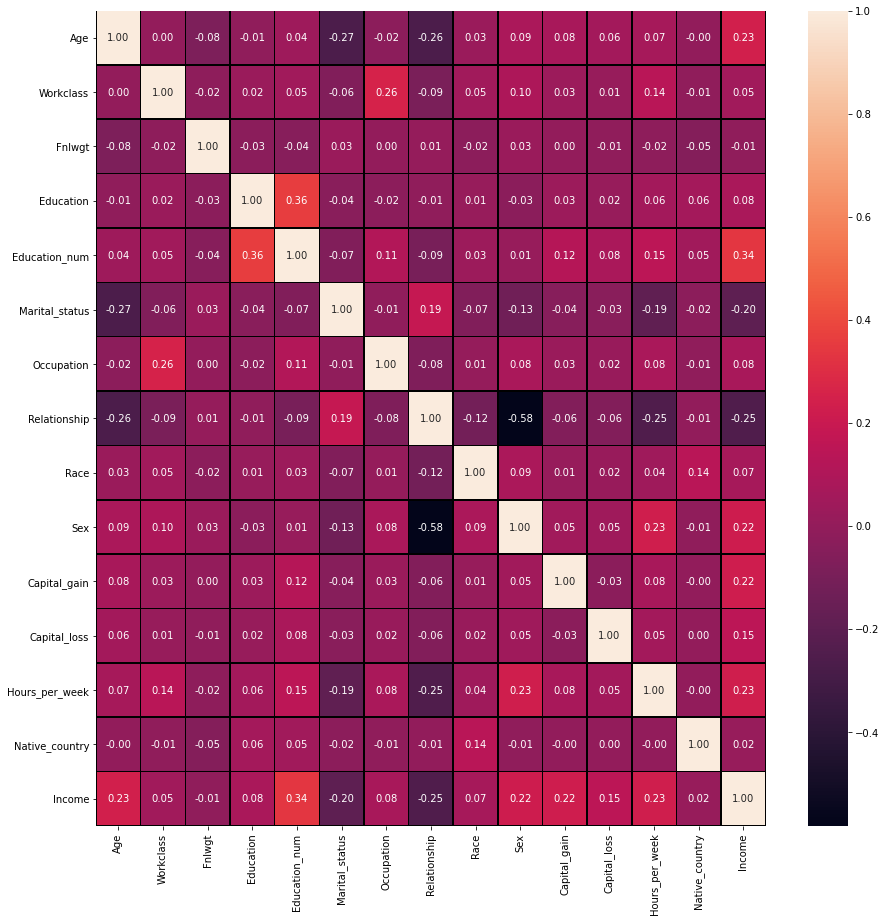

In [40]:
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(),annot=True, linewidth=0.5,linecolor='black', fmt='.2f')
plt.show()

## Zscore to remove outliers

In [41]:
z=np.abs(zscore(df))
threshold=3
df_new=df[(z<3).all(axis=1)]

In [42]:
print(df.shape)
print(df_new.shape)

(32536, 15)
(27399, 15)


In [43]:
loss=(32536-27399)/32536*100
loss

15.788664863535775

In [44]:
df=df_new.copy()

In [45]:
df.skew()

Age                0.483537
Workclass         -0.737658
Fnlwgt             0.627331
Education         -0.957459
Education_num     -0.143317
Marital_status    -0.043793
Occupation         0.130948
Relationship       0.749953
Race              -2.592371
Sex               -0.684100
Capital_gain       4.933077
Capital_loss      29.316076
Hours_per_week    -0.357277
Native_country    -5.466051
Income             1.324408
dtype: float64

## Reducing skewness further using PowerTransformer

In [46]:
# from sklearn.preprocessing import PowerTransformer
# p=PowerTransformer(method='yeo-johnson')
# df=pd.DataFrame(p.fit_transform(df),columns=df.columns)
# df.head(5)

In [47]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif['features']=df.columns
vif['vif_features']=[variance_inflation_factor(df.values,i) for i in range(df.shape[1])]

vif

,features,vif_features
0,Age,10.264573
1,Workclass,8.731356
2,Fnlwgt,4.704344
3,Education,9.293754
4,Education_num,24.174372
5,Marital_status,4.325624
6,Occupation,3.672987
7,Relationship,2.917951
8,Race,37.335124
9,Sex,4.546947


## Splitting the dataset into 2 variables namely 'X' and 'Y' for feature and label

In [48]:
x=df.drop('Income',axis=1)
y=df['Income']

In [49]:
x.shape

(27399, 14)

In [50]:
y.shape

(27399,)

In [51]:
y.value_counts()

0    21263
1     6136
Name: Income, dtype: int64

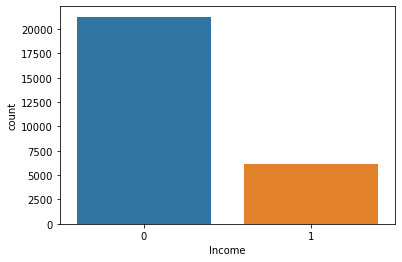

In [52]:
g = sns.countplot(df['Income'])
g.set_xticklabels(['0','1'])
plt.show()

In [54]:
from imblearn.over_sampling import SMOTE

# adding samples to make all the categorical label values same

oversample = SMOTE()
x,y = oversample.fit_resample(x,y)

In [55]:
y.value_counts()

0    21263
1    21263
Name: Income, dtype: int64

## Feature Scaling

In [57]:
sc=StandardScaler()
x=pd.DataFrame(sc.fit_transform(x),columns=x.columns)
x.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country
0,0.815196,1.557005,-1.090209,-0.447142,1.124425,-0.320004,-0.689565,-0.776272,0.318926,0.629658,-0.333024,-0.031683,-2.777329,0.183097
1,-0.172335,0.072848,0.323525,0.138873,-0.623715,-1.845362,-0.185284,-0.129080,0.318926,0.629658,-0.333024,-0.031683,-0.151263,0.183097
2,1.062079,0.072848,0.527304,-2.791201,-1.497784,-0.320004,-0.185284,-0.776272,-3.431456,0.629658,-0.333024,-0.031683,-0.151263,0.183097
3,-0.254629,0.072848,1.059969,0.431880,1.561460,-0.320004,-0.689565,2.459686,0.318926,-1.708639,-0.333024,-0.031683,-0.151263,0.183097
4,0.732902,0.072848,-0.268943,-1.326164,-2.371854,0.442676,0.318997,-0.129080,-3.431456,-1.708639,-0.333024,-0.031683,-2.485543,-6.403947


## Finding best random state for building Classification Models

In [58]:
max_acc=0
max_rs=0

for i in range(0,500):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.25,random_state=i)
    lr=LogisticRegression()
    lr.fit(x_train,y_train)
    pred=lr.predict(x_test)
    acc_score=(accuracy_score(y_test,pred))*100
    
    if acc_score>max_acc:
        max_acc=acc_score
        max_rs=i
        
print("Best accuracy score is", max_acc,"on Random State", max_rs)   

Best accuracy score is 77.79345372460497 on Random State 444


In [59]:
# Classification Model Function

def classify(model,x,y):
    x_train, x_test, y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=444)
    
    # Training the model
    model.fit(x_train,y_train)
    
    # Predicting Y_test
    pred = model.predict(x_test)
    
    # Accuracy Score
    acc_score = (accuracy_score(y_test, pred))*100
    print("Accuracy Score:", acc_score)
    
    # Classification Report
    class_report = classification_report(y_test, pred)
    print("\nClassification Report:\n", class_report)
    
    # Cross Validation Score
    cv_score = (cross_val_score(model,x,y, cv=5).mean())*100
    print("Cross Validation Score:", cv_score)
    
    # Result of accuracy minus cv scores
    result = acc_score - cv_score
    print("\nAccuracy Score - Cross Validation Score is", result)

In [60]:
model=LogisticRegression()
classify(model,x,y)

Accuracy Score: 77.79345372460497

Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.77      0.77      5306
           1       0.77      0.79      0.78      5326

    accuracy                           0.78     10632
   macro avg       0.78      0.78      0.78     10632
weighted avg       0.78      0.78      0.78     10632

Cross Validation Score: 76.63312475904894

Accuracy Score - Cross Validation Score is 1.1603289655560332


In [61]:
model=RandomForestClassifier()
classify(model,x,y)

Accuracy Score: 90.14296463506396

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.91      0.90      5306
           1       0.91      0.89      0.90      5326

    accuracy                           0.90     10632
   macro avg       0.90      0.90      0.90     10632
weighted avg       0.90      0.90      0.90     10632

Cross Validation Score: 88.583854838159

Accuracy Score - Cross Validation Score is 1.5591097969049628


In [62]:
model=DecisionTreeClassifier()
classify(model,x,y)

Accuracy Score: 86.47479307750187

Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.86      0.86      5306
           1       0.86      0.87      0.87      5326

    accuracy                           0.86     10632
   macro avg       0.86      0.86      0.86     10632
weighted avg       0.86      0.86      0.86     10632

Cross Validation Score: 85.52921926812253

Accuracy Score - Cross Validation Score is 0.94557380937934


In [63]:
model=SVC()
classify(model,x,y)

Accuracy Score: 85.82580887885628

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.82      0.85      5306
           1       0.83      0.90      0.86      5326

    accuracy                           0.86     10632
   macro avg       0.86      0.86      0.86     10632
weighted avg       0.86      0.86      0.86     10632

Cross Validation Score: 85.09393943038168

Accuracy Score - Cross Validation Score is 0.7318694484745976


In [64]:
model=KNeighborsClassifier()
classify(model,x,y)

Accuracy Score: 86.42776523702031

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.84      0.86      5306
           1       0.85      0.88      0.87      5326

    accuracy                           0.86     10632
   macro avg       0.86      0.86      0.86     10632
weighted avg       0.86      0.86      0.86     10632

Cross Validation Score: 85.90521336185833

Accuracy Score - Cross Validation Score is 0.5225518751619802


In [82]:
# XGB Classifier
import xgboost as xgb
from xgboost import XGBClassifier

model=xgb.XGBClassifier()
classify(model,x,y)

[15:47:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy Score: 91.38449962377727

Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.93      0.91      5306
           1       0.93      0.90      0.91      5326

    accuracy                           0.91     10632
   macro avg       0.91      0.91      0.91     10632
weighted avg       0.91      0.91      0.91     10632

[15:47:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old beha

In [71]:
from sklearn.ensemble import GradientBoostingClassifier

In [73]:
model=GradientBoostingClassifier()
classify(model,x,y)

Accuracy Score: 90.15237020316027

Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.91      0.90      5306
           1       0.91      0.89      0.90      5326

    accuracy                           0.90     10632
   macro avg       0.90      0.90      0.90     10632
weighted avg       0.90      0.90      0.90     10632

Cross Validation Score: 88.72018050543012

Accuracy Score - Cross Validation Score is 1.432189697730152


## Hypertuning for best selected model

In [74]:
from sklearn.model_selection import GridSearchCV

In [75]:
params = {'max_depth':(2,3,4,5,6),'n_estimators':(50,100,200)}

In [76]:
grid = GridSearchCV(GradientBoostingClassifier()
                    ,param_grid=params,cv=5)
grid.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(),
             param_grid={'max_depth': (2, 3, 4, 5, 6),
                         'n_estimators': (50, 100, 200)})

In [77]:
grid.best_params_

{'max_depth': 5, 'n_estimators': 200}

In [79]:
gb=GradientBoostingClassifier(n_estimators=200, max_depth=5)
gb.fit(x_train,y_train)
pred_gb = gb.predict(x_test)
acc = (accuracy_score(y_test,pred_gb))*100
print('Accuracy for final model(gradient Boosting) is:',acc)

Accuracy for final model(gradient Boosting) is: 91.05530474040631


#### we have sucessfully incorporated the Gradient Bossting Classifier model and get good performancewith accuracy 91.05%

## HyperTuning using XGBClassifer

In [86]:
para= {'booster':["gbtree","gblinear"],'eta': [0.01,0.1,0.2],'min_child_weight':np.arange(5),'max_depth':[10,20,40,60],'subsample':[0.5,1]}

In [87]:
GridCV = GridSearchCV(XGBClassifier(),para,cv=3,n_jobs = -1,verbose = 1)

In [88]:
GridCV.fit(x_train,y_train)

Fitting 3 folds for each of 240 candidates, totalling 720 fits
[23:26:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     enable_categorical=False, gamma=None,
                                     gpu_id=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,...
                                     num_parallel_tree=None, predictor=None,
                                     random_state=None, reg_alpha=None,
                                     reg_lambda=None, scale_pos_weight=None,
                                     subsample=None, tree_

In [89]:
GridCV.best_params_

{'booster': 'gbtree',
 'eta': 0.1,
 'max_depth': 10,
 'min_child_weight': 4,
 'subsample': 1}

In [90]:
mod = XGBClassifier(booster = 'gbtree',eta = 0.1, max_depth= 10, min_child_weight = 4,subsample = 1)
mod.fit(x_train,y_train)
xgbpred = mod.predict(x_test)
acc = accuracy_score(y_test,xgbpred)
print(acc*100)

[23:48:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
91.13054928517683


##### we finally incorprated one more classifier which is giving good result with accuracy score 91.13% and as we see our both model are not overfitted

### we selected our best model as XGBClassifier with accuracy score 91.13%

In [99]:
from sklearn.metrics import confusion_matrix
conf_matrx = confusion_matrix(y_test,xgbpred)
conf_matrx

array([[4911,  390],
       [ 553, 4778]], dtype=int64)

In [100]:
# Saving the model using .pkl
import joblib
joblib.dump(acc,"Censum_Income_project.pkl")

['Censum_Income_project.pkl']